In [1]:
# import packages
import numpy as np
import pandas as pd
from montecarlo.montecarlo import Die, Analyzer, Game
import matplotlib.pyplot as plt

# Scenario 1: 

**A 2-headed coin**

1. Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.

In [2]:
faces = ['H','T']
fair = Die(faces)
unfair = Die(faces)
unfair.change_weight('H', 5)

2. Play a game of 1000 flips with all fair dice.

In [3]:
fair_game = Game([fair, fair, fair])
fair_game.play_game(1000)

3. Play a game of 1000 flips with two unfair dice and one fair die.

In [4]:
unfair2 = Die(faces)
unfair2.change_weight('T', 20)
unfair_game = Game([fair, unfair, unfair])
unfair_game.play_game(1000)

4. For each game, use an Analyzer object to determine the
relative frequency of jackpots – getting either all Hs or all Ts.

In [5]:
fair_analyzer = Analyzer(fair_game)
unfair_analyzer = Analyzer(unfair_game)
fair_analyzer.jackpot()
unfair_analyzer.jackpot()
print('Fair Jackpot Count:', fair_analyzer.jackpot_count)
print('Unfair Jackpot Count:', unfair_analyzer.jackpot_count)

Fair Jackpot Count: 260
Unfair Jackpot Count: 351


5. Compute relative frequency as the number of jackpots over the
total number of rolls.

In [6]:
fair_jackpot_pct = fair_analyzer.jackpot_count/1000
unfair_jackpot_pct = unfair_analyzer.jackpot_count/1000
print('Fair Jackpot Percent:', fair_jackpot_pct)
print('Unfair Jackpot Percent:', unfair_jackpot_pct)

Fair Jackpot Percent: 0.26
Unfair Jackpot Percent: 0.351


6. Show your results, comparing the two relative frequencies, in a
simple bar chart.

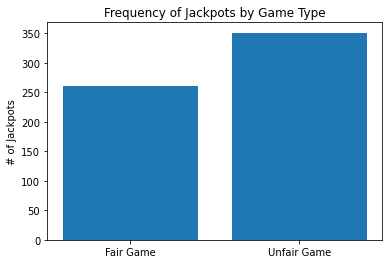

In [7]:
plt.bar(['Fair Game', 'Unfair Game'],[fair_analyzer.jackpot_count, unfair_analyzer.jackpot_count]);
plt.ylabel('# of Jackpots');
plt.title('Frequency of Jackpots by Game Type');

# Scenario 2: 

**A 6-sided die** 

1. Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will weight 1 five times more than the others.

In [8]:
faces2 = [1,2,3,4,5,6]
f_die = Die(faces2)
u_die1 = Die(faces2)
u_die1.change_weight(6, 5)
u_die2 = Die(faces2)
u_die2.change_weight(1, 5)

2. Play a game of 10000 rolls with 5 fair dice.

In [9]:
f_game = Game([f_die, f_die, f_die, f_die, f_die])
f_game.play_game(10000)

3. Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair
die of type 2, and the rest fair dice.

In [10]:
u_game = Game([u_die1, u_die1, u_die2, f_die, f_die])
u_game.play_game(10000)

4. For each game, use an Analyzer object to determine the
relative frequency of jackpots and show your results,
comparing the two relative frequencies, in a simple bar chart.

In [11]:
f_analyzer = Analyzer(f_game)
u_analyzer = Analyzer(u_game)

f_analyzer.jackpot()
u_analyzer.jackpot()
f_analyzer.jackpot_results

Die Number,0,1,2,3,4,jackpot
Roll Number,,,,,,
193,3,3,3,3,3,1
4007,2,2,2,2,2,1
5000,4,4,4,4,4,1
5191,4,4,4,4,4,1
6750,6,6,6,6,6,1
8794,2,2,2,2,2,1
9631,2,2,2,2,2,1


In [12]:
u_analyzer.jackpot_results

Die Number,0,1,2,3,4,jackpot
Roll Number,,,,,,
2664,6,6,6,6,6,1
2781,6,6,6,6,6,1
3333,6,6,6,6,6,1
5701,6,6,6,6,6,1
6258,1,1,1,1,1,1
7999,6,6,6,6,6,1
8260,6,6,6,6,6,1
8290,6,6,6,6,6,1
9951,6,6,6,6,6,1


In [13]:
print('Fair Jackpot Count:', f_analyzer.jackpot_count)
print('Unfair Jackpot Count:', u_analyzer.jackpot_count)

Fair Jackpot Count: 7
Unfair Jackpot Count: 9


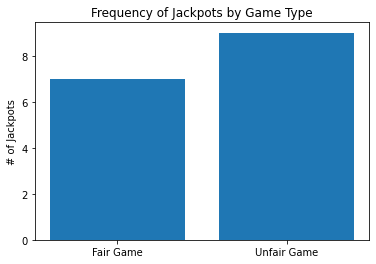

In [14]:
plt.bar(['Fair Game', 'Unfair Game'],[f_analyzer.jackpot_count, u_analyzer.jackpot_count]);
plt.ylabel('# of Jackpots');
plt.title('Frequency of Jackpots by Game Type');

5. Also compute 10 most frequent combinations of faces for each
game. Plot each of these as bar charts.

In [15]:
f_analyzer.combo()
u_analyzer.combo()
top10_fair_combos = f_analyzer.combo_results.head(10)
top10_fair_combos


counts
0 1 2 3 4        
4 4 1 5 1       7
  3 3 2 6       6
6 5 3 6 6       6
1 3 5 5 3       6
5 1 3 1 3       6
2 6 2 5 3       6
6 5 6 2 3       6
  6 4 5 6       6
5 1 5 1 1       5
6 2 6 1 2       5

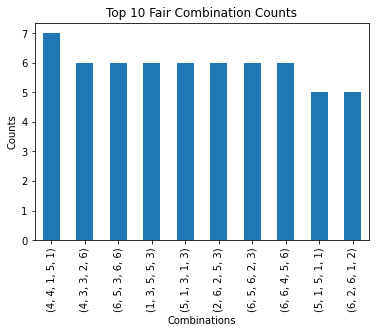

In [16]:
count_series = pd.Series(list(top10_fair_combos.counts.values))
fig = count_series.plot(kind='bar')
x_labels = list(top10_fair_combos.index.values)
fig.set_xticklabels(x_labels);
fig.set_xlabel('Combinations');
fig.set_ylabel('Counts');
fig.set_title('Top 10 Fair Combination Counts');

In [17]:
top10_unfair_combos = u_analyzer.combo_results.head(10)
top10_unfair_combos

counts
0 1 2 3 4        
6 6 1 2 6      48
      5 3      44
      1 3      44
      5 6      44
        5      43
      4 5      42
      6 2      40
      4 2      39
        3      39
      1 4      38

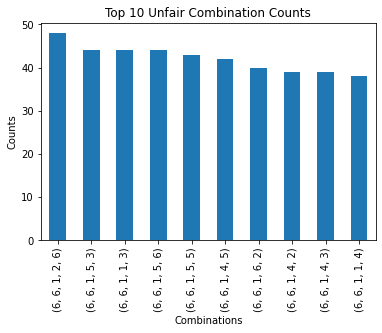

In [18]:
count_series2 = pd.Series(list(top10_unfair_combos.counts.values))
fig2 = count_series2.plot(kind='bar')
x_labels2 = list(top10_unfair_combos.index.values)
fig2.set_xticklabels(x_labels2);
fig2.set_xlabel('Combinations');
fig2.set_ylabel('Counts');
fig2.set_title('Top 10 Unfair Combination Counts');

# Scenario 3: 

**Letters of the Roman Alpha** 

1. Create a "die" of letters from a to z with weights based on their frequency of usage.

In [19]:
letters_freq_dict = {
    'A': 8.4966,
    'B': 2.0720,
    'C': 4.5388,
    'D': 3.3844,
    'E': 11.1607,
    'F': 1.8121,
    'G': 2.4705,
    'H': 3.0034,
    'I': 7.5448,
    'J': 0.1965,
    'K': 1.1016,
    'L': 5.4893,
    'M': 3.0129,
    'N': 6.6544,
    'O': 7.1635,
    'P': 3.1671,
    'Q': 0.1962,
    'R': 7.5809,
    'S': 5.7351,
    'T': 6.9509,
    'U': 3.6308,
    'V': 1.0074,
    'W': 1.2899,
    'X': 0.2902,
    'Y': 1.7779,
    'Z': 0.2722
}
letter_die = Die(list(letters_freq_dict.keys()))

for l, w in letters_freq_dict.items():
    letter_die.change_weight(l, w)
    
letter_die.show_latest_die()

,faces,weights
0,A,8.4966
1,B,2.0720
2,C,4.5388
3,D,3.3844
4,E,11.1607
5,F,1.8121
6,G,2.4705
7,H,3.0034
8,I,7.5448
9,J,0.1965


2. Play a game involving 5 of these dice with 1000 rolls.

In [20]:
letter_game = Game([letter_die, letter_die, letter_die, letter_die, letter_die])
letter_game.play_game(1000)

3. How many combos can you that look like actual English
words? NOTE: "combo" here just means resulting sequence,
not literally combination as opposed to permutation.

In [21]:
letter_analyzer = Analyzer(letter_game)
letter_analyzer.combo()
search_df = letter_analyzer.combo_results.reset_index().sort_values([0])
pd.set_option('max_rows', 1000)
search_df

,0,1,2,3,4,counts
0,A,A,A,A,O,1
659,A,H,M,I,R,1
660,A,A,C,A,E,1
661,A,A,E,I,O,1
662,A,A,E,R,U,1
663,A,A,L,N,E,1
664,A,B,A,M,A,1
665,A,C,L,R,G,1
666,A,C,T,L,C,1
667,A,C,T,U,T,1


4. Based on your eye count, what is the relative frequency of
these words versus the rest?


In [22]:
freq = 2/1000
freq

0.002